In [1]:
import glob
import numpy as np
import pandas as pd 
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from keras.optimizers import Adam 
import os
from sklearn.metrics import classification_report
from tqdm import tqdm
from keras.applications.vgg16 import VGG16
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
    

In [2]:
train_path = '/kaggle/input/intel-image-classification/seg_train'
test_path = '/kaggle/input/intel-image-classification/seg_test'
labels={'buildings':0,'forest':1,'glacier':2,'mountain':3,'sea':4,'street':5}
k = 6 

In [3]:
def getlabel(n):
    for x,y in labels.items():
        if n==y:
            return x

In [4]:
x_train=[]
y_train=[]
for folder in tqdm(os.listdir(os.path.join(train_path, 'seg_train'))):
    folder_path = os.path.join(train_path, 'seg_train', folder)
    files = glob.glob(os.path.join(folder_path, '*.jpg'))
    for file in (files):
        image=cv2.imread(file)
        image_array=cv2.resize(image,(224,224))
        x_train.append(list(image_array))
        y_train.append(labels[folder])

100%|██████████| 6/6 [02:42<00:00, 27.07s/it]


In [5]:
x_test=[]
y_test=[]
for folder in tqdm(os.listdir(os.path.join(test_path, 'seg_test'))):
    folder_path = os.path.join(test_path, 'seg_test', folder)
    files = glob.glob(os.path.join(folder_path, '*.jpg'))
    for file in (files):
        image=cv2.imread(file)
        image_array=cv2.resize(image,(224,224))
        x_test.append(list(image_array))
        y_test.append(labels[folder])

100%|██████████| 6/6 [00:33<00:00,  5.60s/it]


In [6]:
x_train=np.array(x_train) 
y_train=np.array(y_train)
x_test=np.array(x_test) 
y_test=np.array(y_test)
print(  
    f"x_train shape is {x_train.shape}\n"
    f"y_train shape is {y_train.shape}\n"
    f"x_test shape is {x_test.shape}\n"
    f"y_test shape is {y_test.shape}\n")

x_train shape is (14034, 224, 224, 3)
y_train shape is (14034,)
x_test shape is (3000, 224, 224, 3)
y_test shape is (3000,)



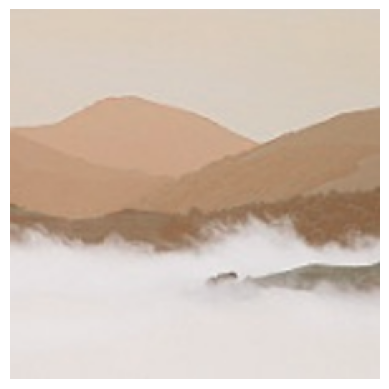

In [ ]:

image = x_train[0]

plt.imshow(image)
plt.axis('off')  
plt.show()


In [8]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [ ]:
simpleCNN = Sequential([
            Conv2D(2,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)),
            BatchNormalization(),
            Conv2D(150,kernel_size=(3,3),activation='relu'),
            MaxPool2D(4,4),
            Conv2D(120,kernel_size=(3,3),activation='relu'),   
            BatchNormalization(),
            Conv2D(80,kernel_size=(3,3),activation='relu'),    
            BatchNormalization(),
            Conv2D(50,kernel_size=(3,3),activation='relu'),
            MaxPool2D(4,4),
            Flatten() ,    
            Dense(4096,activation='relu') ,    
            Dense(4096,activation='relu') ,    
                
            Dense(6,activation='softmax') ,
        ])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
print('Model Details are :')
print(simpleCNN.summary())

Model Details are :


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 222, 222, 2)    │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 222, 222, 2)    │             8 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 220, 220, 150)  │         2,850 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 55, 55, 150)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 53, 53, 120)    │       162,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 53, 53, 120)    │           480 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 51, 51, 80)     │        86,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 51, 51, 80)     │           320 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 49, 49, 50)     │        36,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 12, 12, 50)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 7200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4096)           │    29,495,296 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 6)              │        24,582 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 46,589,554 (177.73 MB)

 Trainable params: 46,589,150 (177.72 MB)

 Non-trainable params: 404 (1.58 KB)

None


In [ ]:
opt = Adam(learning_rate=0.0001)

simpleCNN.compile(optimizer = opt,loss='sparse_categorical_crossentropy',metrics=['accuracy'])


In [21]:
epochs = 10

ThisModel = simpleCNN.fit(
    x_train, y_train,
    epochs=epochs,
    batch_size=64,
    validation_data=(x_val, y_val),
    verbose=1,
)

Epoch 1/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 36s 179ms/step - accuracy: 0.4816 - loss: 2.3277 - val_accuracy: 0.3883 - val_loss: 1.5837
Epoch 2/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 18s 104ms/step - accuracy: 0.7450 - loss: 0.6808 - val_accuracy: 0.5194 - val_loss: 1.4374
Epoch 3/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 18s 104ms/step - accuracy: 0.8167 - loss: 0.5104 - val_accuracy: 0.7684 - val_loss: 0.6660
Epoch 4/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 18s 105ms/step - accuracy: 0.8446 - loss: 0.4310 - val_accuracy: 0.8123 - val_loss: 0.5483
Epoch 5/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 18s 105ms/step - accuracy: 0.8816 - loss: 0.3279 - val_accuracy: 0.8033 - val_loss: 0.5633
Epoch 6/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 18s 104ms/step - accuracy: 0.9109 - loss: 0.2530 - val_accuracy: 0.7937 - val_loss: 0.6370
Epoch 7/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 18s 104ms/step - accuracy: 0.9401 - loss: 0.1703 - val_accuracy: 0.8041 - val_loss: 0.6350
Epoch 8/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 18s 104ms/step - accuracy: 0.9458 - loss: 0

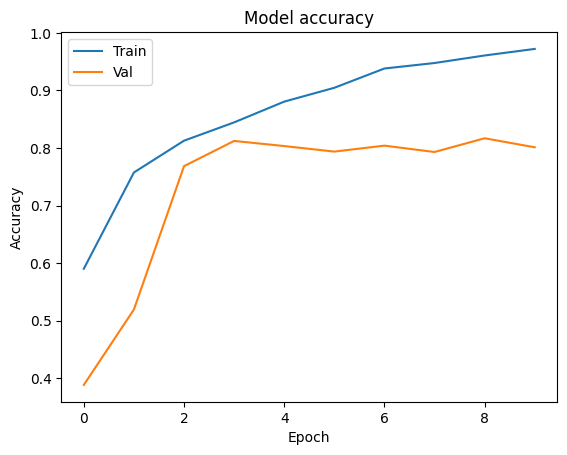

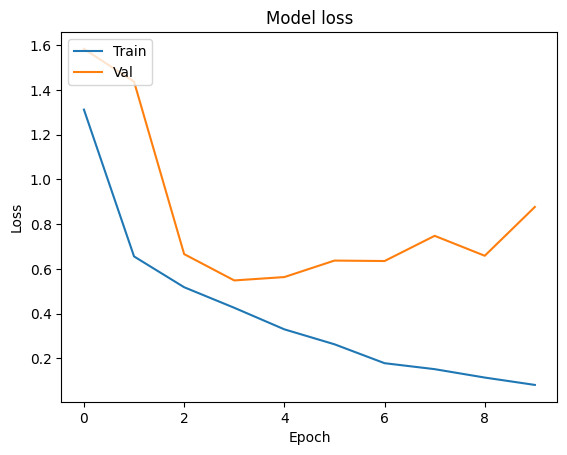

In [22]:
plt.plot(ThisModel.history['accuracy'])
plt.plot(ThisModel.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

plt.plot(ThisModel.history['loss'])
plt.plot(ThisModel.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [23]:
model_loss,model_accuracy=simpleCNN.evaluate(x_test, y_test)
print('Test Loss is {}'.format(model_loss))
print('Test Accuracy is {}'.format(model_accuracy ))

94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.7258 - loss: 1.2256
Test Loss is 0.902921736240387
Test Accuracy is 0.7986666560173035


In [24]:
predictions = simpleCNN.predict(x_test)
pred_labels = np.argmax(predictions, axis=1)

94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step


In [25]:
print(classification_report(y_test, pred_labels))

              precision    recall  f1-score   support

           0       0.89      0.64      0.75       437
           1       0.84      0.98      0.90       474
           2       0.69      0.84      0.76       553
           3       0.84      0.64      0.73       525
           4       0.79      0.86      0.82       510
           5       0.83      0.83      0.83       501

    accuracy                           0.80      3000
   macro avg       0.81      0.80      0.80      3000
weighted avg       0.81      0.80      0.80      3000



In [26]:
vgg16 = VGG16()

553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [27]:
vgg16.summary()


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ predictions (Dense)             │ (None, 1000)           │     4,097,000 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

In [28]:
vgg16_layer_list = vgg16.layers
vgg16Model = Sequential()
for i in range(len(vgg16_layer_list)-1):
    vgg16Model.add(vgg16_layer_list[i])

In [29]:
vgg16Model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,312 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 134,260,544 (512.16 MB)

 Trainable params: 134,260,544 (512.16 MB)

 Non-trainable params: 0 (0.00 B)

In [30]:
for layers in vgg16Model.layers:
    layers.trainable = False

In [31]:
vgg16Model.add(Dense(k, activation = "softmax"))


In [32]:
vgg16Model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 6)              │        24,582 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 134,285,126 (512.26 MB)

 Trainable params: 24,582 (96.02 KB)

 Non-trainable params: 134,260,544 (512.16 MB)

In [33]:
opt = Adam(learning_rate=0.0001)

vgg16Model.compile(optimizer = opt,loss='sparse_categorical_crossentropy',metrics=['accuracy'])


In [34]:
epochs = 10
ThisModelvgg16 = vgg16Model.fit(
    x_train, y_train,
    epochs=epochs,
    batch_size=64,
    validation_data=(x_val, y_val),
    verbose=1,
)


Epoch 1/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 60s 252ms/step - accuracy: 0.6429 - loss: 1.0135 - val_accuracy: 0.8807 - val_loss: 0.3243
Epoch 2/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 25s 145ms/step - accuracy: 0.8876 - loss: 0.3127 - val_accuracy: 0.8967 - val_loss: 0.2732
Epoch 3/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 25s 145ms/step - accuracy: 0.9077 - loss: 0.2577 - val_accuracy: 0.9049 - val_loss: 0.2538
Epoch 4/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 25s 145ms/step - accuracy: 0.9156 - loss: 0.2369 - val_accuracy: 0.9092 - val_loss: 0.2456
Epoch 5/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 25s 145ms/step - accuracy: 0.9258 - loss: 0.2140 - val_accuracy: 0.9134 - val_loss: 0.2339
Epoch 6/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 25s 145ms/step - accuracy: 0.9282 - loss: 0.2051 - val_accuracy: 0.9134 - val_loss: 0.2317
Epoch 7/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 25s 145ms/step - accuracy: 0.9325 - loss: 0.1943 - val_accuracy: 0.9181 - val_loss: 0.2263
Epoch 8/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 25s 145ms/step - accuracy: 0.9358 - loss: 0

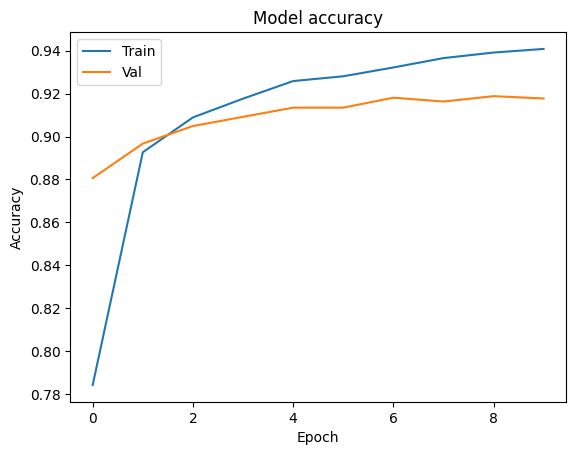

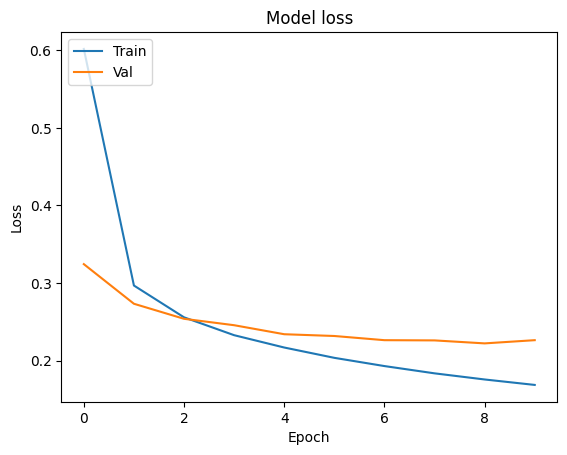

In [35]:
plt.plot(ThisModelvgg16.history['accuracy'])
plt.plot(ThisModelvgg16.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

plt.plot(ThisModelvgg16.history['loss'])
plt.plot(ThisModelvgg16.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [36]:
model_loss,model_accuracy=vgg16Model.evaluate(x_test, y_test)
print('Test Loss is {}'.format(model_loss))
print('Test Accuracy is {}'.format(model_accuracy ))

94/94 ━━━━━━━━━━━━━━━━━━━━ 20s 133ms/step - accuracy: 0.9164 - loss: 0.2158
Test Loss is 0.22950172424316406
Test Accuracy is 0.9139999747276306


In [37]:
predictions = vgg16Model.predict(x_test)
pred_labels = np.argmax(predictions, axis=1)

94/94 ━━━━━━━━━━━━━━━━━━━━ 6s 62ms/step


In [38]:
print(classification_report(y_test, pred_labels))

              precision    recall  f1-score   support

           0       0.92      0.91      0.92       437
           1       0.99      1.00      0.99       474
           2       0.89      0.79      0.84       553
           3       0.83      0.90      0.86       525
           4       0.95      0.97      0.96       510
           5       0.92      0.92      0.92       501

    accuracy                           0.91      3000
   macro avg       0.92      0.92      0.92      3000
weighted avg       0.91      0.91      0.91      3000

